In [2]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt


In [3]:
# problem 1
df = pd.read_csv('movie_dataset.csv')

In [4]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.041000e+03,4041.000000,4041.000000,4.041000e+03,4041.000000,4041.000000,4041.000000
mean,3.285372e+07,57982.927988,23.492294,9.695165e+07,107.493442,6.092551,784.679782
std,4.271586e+07,89651.272534,34.168782,1.734437e+08,23.434256,1.242561,1321.321087
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3.000000e+06,8536.000000,3.674294,2.154540e+06,94.000000,5.600000,49.000000
50%,1.800000e+07,14914.000000,15.131867,3.264555e+07,104.000000,6.200000,299.000000
75%,4.500000e+07,60420.000000,31.893932,1.133741e+08,119.000000,6.800000,890.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [5]:
df.dtypes

budget               float64
genres                object
id                     int64
original_language     object
popularity           float64
release_date          object
revenue              float64
runtime              float64
title                 object
vote_average         float64
vote_count             int64
director              object
dtype: object

In [6]:
df['genres'].value_counts()

Drama                                             306
Comedy                                            239
Drama Romance                                     123
Comedy Romance                                    123
Comedy Drama                                      105
                                                 ... 
Drama Adventure Action History                      1
Adventure Fantasy Action Western Thriller           1
Adventure Drama Romance Action                      1
Action Adventure Comedy Family Science-Fiction      1
Comedy Drama Romance TV-Movie                       1
Name: genres, Length: 1045, dtype: int64

In [7]:
# problem 2
df['budget'].replace(0,np.nan,inplace=True)
df.isna().sum()

budget               599
genres                28
id                     0
original_language      0
popularity             0
release_date           1
revenue                0
runtime                0
title                  0
vote_average           0
vote_count             0
director              36
dtype: int64

In [8]:
empty = df[['original_language','genres','title','director']].apply(lambda x:x=="")
empty.value_counts()

original_language  genres  title  director
False              False   False  False       4041
dtype: int64

In [9]:
df['revenue'].fillna(df['revenue'].mean(), inplace=True)
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)
df.dropna(inplace=True)

In [10]:
df.isna().sum()

budget               0
genres               0
id                   0
original_language    0
popularity           0
release_date         0
revenue              0
runtime              0
title                0
vote_average         0
vote_count           0
director             0
dtype: int64

In [11]:
# problem 3
df['year'] = df['release_date'].apply(lambda x:x.split('-',2)[2])
df['year'].value_counts()

2006    204
2013    198
2011    196
2009    195
2010    189
       ... 
1935      1
1927      1
1916      1
1934      1
1925      1
Name: year, Length: 90, dtype: int64

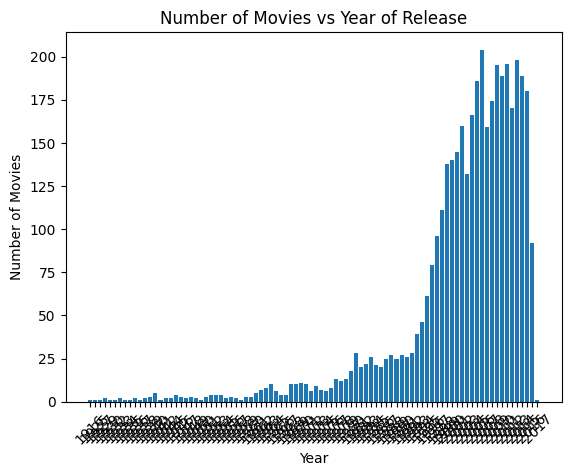

In [38]:
year_counts = df['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies vs Year of Release')
plt.xticks(rotation=45)
plt.show()



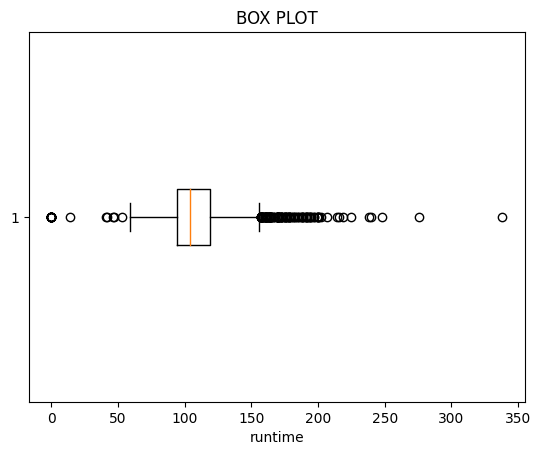

In [13]:
plt.xlabel("runtime")
plt.title("BOX PLOT")
plt.boxplot(df['runtime'],vert=False)
plt.show()

In [17]:
#problem 5
df['roi'] = df['revenue']/df['budget']
df['roi']

0       11.763566
1        3.203333
2        3.594590
3        4.339756
4        1.092843
          ...    
4035     0.000000
4036     9.276909
4037     0.000000
4038     0.000000
4040     0.000000
Name: roi, Length: 3991, dtype: float64

In [23]:
df_sorted_bybudget = df.sort_values(by='budget', ascending=False)
df_sorted_bybudget['title'].head(20)

17    Pirates of the Caribbean: On Stranger Tides
1        Pirates of the Caribbean: At World's End
7                         Avengers: Age of Ultron
10                               Superman Returns
4                                     John Carter
6                                         Tangled
5                                    Spider-Man 3
13                                The Lone Ranger
46                     X-Men: Days of Future Past
22            The Hobbit: The Desolation of Smaug
98              The Hobbit: An Unexpected Journey
26                     Captain America: Civil War
9              Batman v Superman: Dawn of Justice
19      The Hobbit: The Battle of the Five Armies
8          Harry Potter and the Half-Blood Prince
3                           The Dark Knight Rises
2                                         Spectre
0                                          Avatar
18                                 Men in Black 3
14                                   Man of Steel


In [24]:
df_sorted_revenue = df.sort_values(by='revenue', ascending=False)
df_sorted_revenue['title'].head(20)

0                                             Avatar
25                                           Titanic
16                                      The Avengers
44                                         Furious 7
7                            Avengers: Age of Ultron
124                                           Frozen
31                                        Iron Man 3
529                                          Minions
26                        Captain America: Civil War
52                    Transformers: Dark of the Moon
325    The Lord of the Rings: The Return of the King
29                                           Skyfall
36                   Transformers: Age of Extinction
3                              The Dark Knight Rises
42                                       Toy Story 3
12        Pirates of the Caribbean: Dead Man's Chest
17       Pirates of the Caribbean: On Stranger Tides
32                               Alice in Wonderland
98                 The Hobbit: An Unexpected J

In [25]:
df_sorted_roi = df.sort_values(by='roi', ascending=False)
df_sorted_roi['title'].head(20)

3560                       Modern Times
2696                          Nurse 3-D
3840                Paranormal Activity
3845                          Tarnation
3767            The Blair Witch Project
3969                         Eraserhead
4026                     Pink Flamingos
3983                      Super Size Me
3968                        The Gallows
3784                         Open Water
2709       The Texas Chain Saw Massacre
3721                              Bambi
3920                   The Stewardesses
3153           Night of the Living Dead
3922                            Mad Max
2131                          Halloween
3742                  American Graffiti
3951                               Once
3579    Snow White and the Seven Dwarfs
3636                              Rocky
Name: title, dtype: object

In [26]:
df.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director,year,roi
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron,2009,11.763566
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski,2007,3.203333
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes,2015,3.594590
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan,2012,4.339756
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton,2012,1.092843


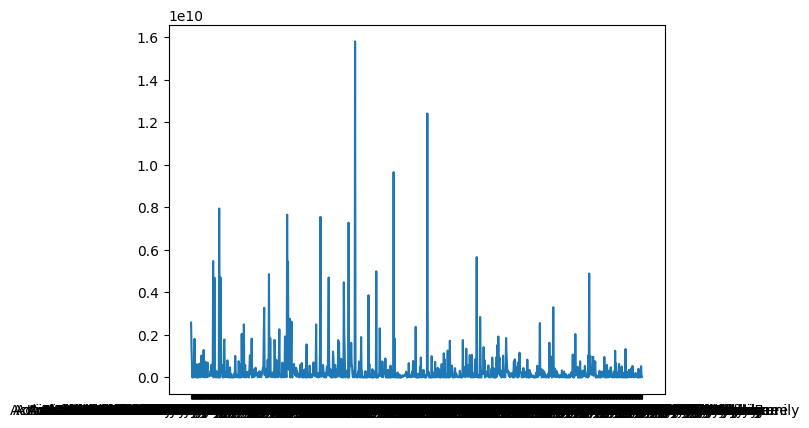

In [34]:
#problem 6
grouped_df = df.groupby('genres')['revenue'].sum().reset_index()
plt.plot(grouped_df['genres'],grouped_df['revenue'])

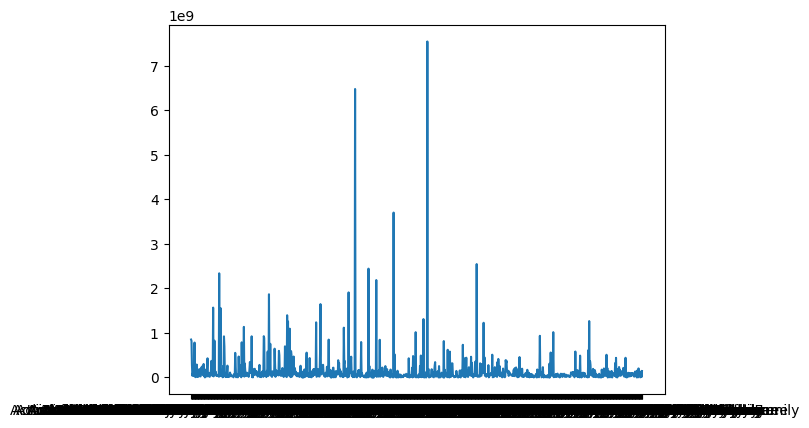

In [36]:
grouped_df = df.groupby('genres')['budget'].sum().reset_index()
plt.plot(grouped_df['genres'],grouped_df['budget'])